___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- Aplicar con éxito en la red neuronal a un problema de clasificación requiere que los valores de la red estén limitados en un rango de 0 y 1.
- Una transformación no lineal es incluída en el modelo de red neuronal. Usualmente esta transformación es una función sigmoidal. 

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

**Modelo matemático**

<font color= #66CC00>$$\nu^{1} = w_{0}^{1}+w^{1}$$</font>
<font color= #66CC00>$$y^{1} = \varphi(\nu^{1})$$</font>
<font color= #009900>$$\nu^{2} = w_{0}^{2}+w^{2}y_{1}$$</font>
<font color= #009900>$$y^{2} = \varphi(\nu^{2})$$</font>
<font color= #3399FF>$$\nu^{3} = w_{0}^{3}+w^{3}y_{2}$$</font>
<font color= #3399FF>$$y^{3} = \varphi(\nu^{3})$$</font>

Para un problema de clasificación multiclase, el número de salidas aumenta en función del número de clases a clasificar

**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 0.6284 - accuracy: 0.6629
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.6760
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 0.6118 - accuracy: 0.6816
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6043 - accuracy: 0.6909
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5972 - accuracy: 0.6965
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7076
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.7169
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.7207
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.7225
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.7263
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7803
Epoch 85/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7840
Epoch 86/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4570 - accuracy: 0.7821
Epoch 87/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.7821
Epoch 88/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7821
Epoch 89/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 0.7821
Epoch 90/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.7840
Epoch 91/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7840
Epoch 92/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7840
Epoch 93/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.7840
Epoch 94/200
6/6 [===============

6/6 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.7803
Epoch 168/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.7803
Epoch 169/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4461 - accuracy: 0.7803
Epoch 170/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7803
Epoch 171/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7803
Epoch 172/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.7803
Epoch 173/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4459 - accuracy: 0.7803
Epoch 174/200
6/6 [==============================] - 0s 949us/step - loss: 0.4458 - accuracy: 0.7803
Epoch 175/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4458 - accuracy: 0.7803
Epoch 176/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4457 - accuracy: 0.7803
Epoch 177/200
6/6 [===

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

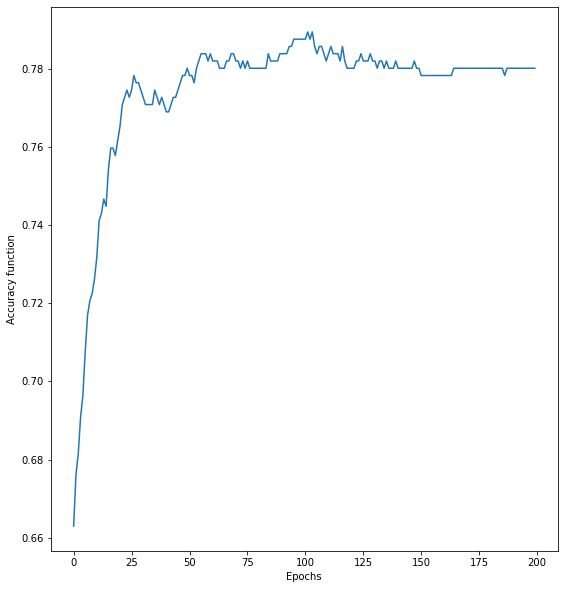

In [8]:
#Ver el performance del modelo en el entrenamiento
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [9]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")


8/8 [==============================] - 0s 2ms/step


In [10]:
Y_pred

array([[0.26888117],
       [0.13939308],
       [0.08987923],
       [0.28588742],
       [0.54809153],
       [0.43042699],
       [0.02122162],
       [0.67798895],
       [0.6524538 ],
       [0.645802  ],
       [0.24493134],
       [0.78283304],
       [0.4552912 ],
       [0.30534527],
       [0.08371574],
       [0.4017931 ],
       [0.12104912],
       [0.04829602],
       [0.82511926],
       [0.64075494],
       [0.2605629 ],
       [0.05867547],
       [0.48559895],
       [0.06526577],
       [0.5667101 ],
       [0.8847112 ],
       [0.08694103],
       [0.03057555],
       [0.25435993],
       [0.09637661],
       [0.9103619 ],
       [0.72752035],
       [0.848151  ],
       [0.8599205 ],
       [0.5865841 ],
       [0.6999458 ],
       [0.7908563 ],
       [0.24756613],
       [0.44529888],
       [0.7067827 ],
       [0.04624542],
       [0.65399885],
       [0.5899608 ],
       [0.43880668],
       [0.0413006 ],
       [0.52983654],
       [0.7533656 ],
       [0.182

In [11]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [12]:
#Evaluar modelo
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

8/8 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.7403
[0.506792426109314, 0.7402597665786743]


In [13]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))


accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 1ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.780 	 0.713 	 0.622
  Test 	 0.740 	 0.622 	 0.637


In [14]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)
Yhat = model_log.predict(X_train)

accu_train = accuracy_score(Y_train,Yhat)
prec_train = precision_score(Y_train,Yhat)
reca_train = recall_score(Y_train,Yhat)

Yhat = model_log.predict(X_test)
accu_test = accuracy_score(Y_test,Yhat)
prec_test = precision_score(Y_test,Yhat)
reca_test = recall_score(Y_test,Yhat)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.782 	 0.741 	 0.580
  Test 	 0.736 	 0.617 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [15]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [16]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
#creamos la variable target a dummies
dummy_y = np_utils.to_categorical(Y).astype(int)

In [20]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [21]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [22]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))

Epoch 1/200


C:\Users\09090\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 517ms/step - loss: 1.8527 - accuracy: 0.3250 - val_loss: 3.4915 - val_accuracy: 0.3000
Epoch 2/200
2/2 [==============================] - 0s 47ms/step - loss: 2.9494 - accuracy: 0.3500 - val_loss: 0.9021 - val_accuracy: 0.3667
Epoch 3/200
2/2 [==============================] - 0s 54ms/step - loss: 0.9401 - accuracy: 0.3667 - val_loss: 0.8724 - val_accuracy: 0.7000
Epoch 4/200
2/2 [==============================] - 0s 54ms/step - loss: 0.8910 - accuracy: 0.6583 - val_loss: 0.7913 - val_accuracy: 0.7000
Epoch 5/200
2/2 [==============================] - 0s 48ms/step - loss: 0.8186 - accuracy: 0.6583 - val_loss: 0.7254 - val_accuracy: 0.7000
Epoch 6/200
2/2 [==============================] - 0s 54ms/step - loss: 0.7457 - accuracy: 0.6667 - val_loss: 0.6725 - val_accuracy: 0.7333
Epoch 7/200
2/2 [==============================] - 0s 50ms/step - loss: 0.6834 - accuracy: 0.7000 - val_loss: 0.6271 - val_accuracy: 0.7667
Epoch 8/200
2/2 [==============

2/2 [==============================] - 0s 57ms/step - loss: 0.2379 - accuracy: 0.9667 - val_loss: 0.2688 - val_accuracy: 0.9000
Epoch 60/200
2/2 [==============================] - 0s 50ms/step - loss: 0.2583 - accuracy: 0.9583 - val_loss: 0.2450 - val_accuracy: 0.9667
Epoch 61/200
2/2 [==============================] - 0s 58ms/step - loss: 0.2437 - accuracy: 0.9417 - val_loss: 0.2325 - val_accuracy: 0.9667
Epoch 62/200
2/2 [==============================] - 0s 59ms/step - loss: 0.2361 - accuracy: 0.9667 - val_loss: 0.2320 - val_accuracy: 0.9667
Epoch 63/200
2/2 [==============================] - 0s 50ms/step - loss: 0.2315 - accuracy: 0.9500 - val_loss: 0.2255 - val_accuracy: 0.9667
Epoch 64/200
2/2 [==============================] - 0s 60ms/step - loss: 0.2319 - accuracy: 0.9667 - val_loss: 0.2241 - val_accuracy: 0.9667
Epoch 65/200
2/2 [==============================] - 0s 50ms/step - loss: 0.2231 - accuracy: 0.9667 - val_loss: 0.2244 - val_accuracy: 0.9667
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 51ms/step - loss: 0.1577 - accuracy: 0.9667 - val_loss: 0.1728 - val_accuracy: 0.9333
Epoch 118/200
2/2 [==============================] - 0s 57ms/step - loss: 0.1688 - accuracy: 0.9667 - val_loss: 0.1783 - val_accuracy: 0.9667
Epoch 119/200
2/2 [==============================] - 0s 48ms/step - loss: 0.1784 - accuracy: 0.9583 - val_loss: 0.1517 - val_accuracy: 0.9667
Epoch 120/200
2/2 [==============================] - 0s 52ms/step - loss: 0.1490 - accuracy: 0.9667 - val_loss: 0.2117 - val_accuracy: 0.9000
Epoch 121/200
2/2 [==============================] - 0s 56ms/step - loss: 0.2136 - accuracy: 0.9417 - val_loss: 0.1526 - val_accuracy: 0.9667
Epoch 122/200
2/2 [==============================] - 0s 49ms/step - loss: 0.1577 - accuracy: 0.9667 - val_loss: 0.1463 - val_accuracy: 1.0000
Epoch 123/200
2/2 [==============================] - 0s 52ms/step - loss: 0.1513 - accuracy: 0.9833 - val_loss: 0.1715 - val_accuracy: 0.9333
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 57ms/step - loss: 0.1289 - accuracy: 0.9667 - val_loss: 0.1200 - val_accuracy: 1.0000
Epoch 176/200
2/2 [==============================] - 0s 53ms/step - loss: 0.1230 - accuracy: 0.9750 - val_loss: 0.1217 - val_accuracy: 1.0000
Epoch 177/200
2/2 [==============================] - 0s 54ms/step - loss: 0.1247 - accuracy: 0.9750 - val_loss: 0.1217 - val_accuracy: 1.0000
Epoch 178/200
2/2 [==============================] - 0s 54ms/step - loss: 0.1312 - accuracy: 0.9667 - val_loss: 0.1341 - val_accuracy: 0.9667
Epoch 179/200
2/2 [==============================] - 0s 56ms/step - loss: 0.1408 - accuracy: 0.9667 - val_loss: 0.1198 - val_accuracy: 1.0000
Epoch 180/200
2/2 [==============================] - 0s 58ms/step - loss: 0.1284 - accuracy: 0.9833 - val_loss: 0.1324 - val_accuracy: 0.9667
Epoch 181/200
2/2 [==============================] - 0s 51ms/step - loss: 0.1345 - accuracy: 0.9667 - val_loss: 0.1230 - val_accuracy: 1.0000
Epoch 

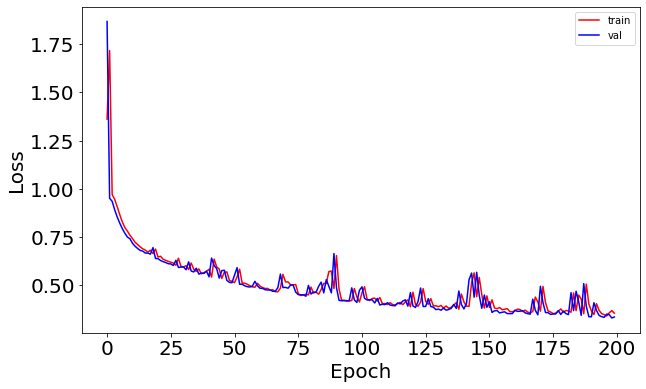

In [23]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [24]:
#Predecir con el modelo
#Y_pred = model.predict_classes(X)
#Y_prob = model.predict_proba(X)


Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 41ms/step


In [25]:
Y_pred

array([[5.45017201e-07, 7.86734283e-01, 2.13265106e-01],
       [9.60370302e-01, 3.95933129e-02, 3.64063781e-05],
       [9.56054768e-24, 1.85824378e-04, 9.99814212e-01],
       [2.52550961e-07, 7.44874120e-01, 2.55125612e-01],
       [5.41331190e-07, 7.86385655e-01, 2.13613734e-01],
       [9.60370302e-01, 3.95933129e-02, 3.64063781e-05],
       [1.05708195e-02, 9.78184700e-01, 1.12444470e-02],
       [2.25948687e-12, 1.08735383e-01, 8.91264558e-01],
       [3.98130950e-09, 4.66579884e-01, 5.33420146e-01],
       [6.98610558e-04, 9.72162127e-01, 2.71392968e-02],
       [2.82568430e-11, 1.88849926e-01, 8.11150074e-01],
       [9.60370302e-01, 3.95933129e-02, 3.64063781e-05],
       [9.60370302e-01, 3.95933129e-02, 3.64063781e-05],
       [9.60370302e-01, 3.95933129e-02, 3.64063781e-05],
       [9.60370302e-01, 3.95933129e-02, 3.64063781e-05],
       [5.43879537e-07, 7.86626935e-01, 2.13372499e-01],
       [1.08948695e-17, 5.76697895e-03, 9.94232953e-01],
       [2.11421691e-04, 9.60302

In [26]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [27]:
#Reverse
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [28]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [29]:
#Más métricas corregido
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')

Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 42ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.967 	 0.970 	 0.967
  Test 	 0.967 	 0.969 	 0.967


In [30]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
Yhat = model_log.predict(X_test)

accu_train = accuracy_score(y_train,model_log.predict(X_train))
prec_train = precision_score(y_train,model_log.predict(X_train),average='weighted')
reca_train = recall_score(y_train,model_log.predict(X_train),average='weighted')

accu_test = accuracy_score(y_test,model_log.predict(X_test))
prec_test = precision_score(y_test,model_log.predict(X_test),average='weighted')
reca_test = recall_score(y_test,model_log.predict(X_test),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.975 	 0.977 	 0.975
  Test 	 1.000 	 1.000 	 1.000


C:\Users\09090\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
